<a href="https://colab.research.google.com/github/Rakshanjain/Mini-Project-Image-Classification/blob/master/Project_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image-Classifiaction using Machine Learning Concepts:



In [48]:
import os
import numpy as np

from skimage.io import imread
from skimage.transform import resize

target = [] # THis is the list of target output
flat_data = [] # image pixel in flatten style
images = []

path = '/content/drive/My Drive/Machine learning/Image_Classification/Image_Classification/' # This Path is to Gather the data(Images) from drive
# The below steps are to Pre-Process the data 
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames: 
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resize = resize(img,(50,50,3)) # This is for Scaling down
    flat_data.append(img_resize.flatten()) # Flattening of an Image
    images.append(img_resize)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

(50, 7500)
(50,)
(50, 50, 50, 3)


In [49]:
# Creating the Dataframe and display
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.294118,0.277561,0.192157,0.287192,0.263765,0.177490,0.339216,0.303922,0.205373,0.331922,0.304471,0.210745,0.274510,0.258824,0.176471,0.250980,0.243137,0.164400,0.243137,0.235294,0.164706,0.235294,0.227451,0.160784,0.247059,0.239216,0.164706,0.239216,0.234988,0.166737,0.238910,0.239216,0.176471,0.230980,0.235294,0.168627,0.271098,0.278941,0.215686,0.281043,...,0.744157,0.757373,0.514235,0.761702,0.785333,0.537255,0.741176,0.742353,0.509804,0.734204,0.725490,0.490196,0.749020,0.744078,0.493098,0.768627,0.772039,0.529412,0.776471,0.784314,0.545200,0.754118,0.754118,0.518824,0.753247,0.745098,0.525490,0.760784,0.764706,0.552941,0.765216,0.772549,0.561804,0.760784,0.748729,0.546118,0.787365,0.772549,0.572549,hippopotamus images
1,0.121569,0.109804,0.090196,0.129412,0.117647,0.098039,0.141176,0.125490,0.101961,0.158824,0.139216,0.117647,0.176471,0.156863,0.133333,0.145098,0.129412,0.105882,0.188235,0.164706,0.132353,0.164706,0.145098,0.115686,0.149020,0.132353,0.109804,0.172549,0.149020,0.122549,0.180392,0.152941,0.129412,0.168627,0.145098,0.117647,0.189216,0.164706,0.133333,0.176471,...,0.452941,0.378431,0.289216,0.562745,0.484314,0.396078,0.653922,0.575490,0.486275,0.682353,0.587255,0.480392,0.650980,0.554902,0.439216,0.565686,0.490196,0.398039,0.622549,0.546078,0.459804,0.642157,0.563725,0.468627,0.500980,0.437255,0.354902,0.458824,0.400000,0.325490,0.658824,0.584314,0.494118,0.694118,0.611765,0.521569,0.681373,0.596078,0.501961,hippopotamus images
2,0.039970,0.057804,0.069569,0.119373,0.146824,0.162510,0.246902,0.309647,0.337098,0.218380,0.274118,0.308392,0.146431,0.181725,0.213098,0.090196,0.124941,0.140627,0.039216,0.058824,0.066667,0.039216,0.055192,0.066667,0.080706,0.104235,0.113762,0.212235,0.251451,0.251451,0.346196,0.419371,0.442431,0.347922,0.430196,0.461569,0.185765,0.226941,0.237255,0.058882,...,0.835294,0.800000,0.792157,0.831431,0.800000,0.792157,0.819608,0.790353,0.772549,0.815686,0.790963,0.764706,0.815686,0.788235,0.764706,0.795161,0.764706,0.745388,0.801103,0.770118,0.756863,0.815686,0.784314,0.768627,0.807843,0.780392,0.760784,0.803922,0.777490,0.764706,0.796078,0.772549,0.755686,0.800000,0.772549,0.759922,0.798980,0.768627,0.760784,hippopotamus images
3,0.807843,0.679412,0.556863,0.835294,0.703922,0.572549,0.827451,0.694118,0.568627,0.860784,0.729412,0.598039,0.865686,0.737255,0.614706,0.900980,0.764706,0.625490,0.919608,0.788235,0.648039,0.884314,0.768627,0.658824,0.856863,0.742157,0.639216,0.847059,0.735294,0.637255,0.849020,0.737255,0.641176,0.852941,0.739216,0.630392,0.833333,0.716667,0.609804,0.817647,...,0.555882,0.505882,0.466667,0.580392,0.527451,0.488235,0.565686,0.520588,0.486275,0.607843,0.556863,0.505882,0.566667,0.531373,0.503922,0.593137,0.551961,0.515686,0.572549,0.539216,0.510784,0.608824,0.565686,0.525490,0.527451,0.501961,0.483333,0.590196,0.546078,0.510784,0.689216,0.632353,0.561765,0.637255,0.600000,0.550980,0.605882,0.558824,0.493137,hippopotamus images
4,0.661373,0.531961,0.032549,0.702549,0.576471,0.058824,0.721569,0.592745,0.150392,0.701961,0.584314,0.102549,0.717647,0.617647,0.133922,0.745098,0.652941,0.217647,0.752941,0.653529,0.264706,0.764706,0.650980,0.325490,0.790196,0.688235,0.377843,0.831373,0.725490,0.409804,0.835294,0.710392,0.375686,0.819608,0.690196,0.295294,0.839216,0.709804,0.358824,0.816275,...,0.770588,0.704706,0.486275,0.735294,0.671176,0.401176,0.617647,0.575686,0.200588,0.590196,0.547647,0.168627,0.619608,0.575098,0.169804,0.528235,0.523529,0.131373,0.457451,0.482941,0.113137,0.339804,0.333922,0.071176,0.307059,0.255490,0.054902,0.303137,0.299216,0.054902,0.298039,0.254902,0.047059,0.363333,0.280392,0.064706,0.279804,0.203922,0.066078,hippopotamus image

In [50]:
x = flat_data
y = target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

# Applying SVC(Support Vector Classifier Algorithm) for prediction

In [51]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
y_pred = model.predict(x_test)
y_pred

array(['lion images', 'hippopotamus images', 'hippopotamus images',
       'lion images', 'hippopotamus images', 'lion images', 'lion images',
       'lion images', 'lion images', 'hippopotamus images', 'lion images',
       'lion images', 'lion images'], dtype='<U19')

In [53]:
y_test

array(['lion images', 'hippopotamus images', 'hippopotamus images',
       'lion images', 'hippopotamus images', 'lion images', 'lion images',
       'lion images', 'hippopotamus images', 'hippopotamus images',
       'lion images', 'lion images', 'lion images'], dtype='<U19')

# To find the Accuracy of the Model

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy_score(y_pred,y_test) 

0.9230769230769231

# Evaluate the model using Confusion Matrix

In [55]:
confusion_matrix(y_pred,y_test) 

array([[4, 0],
       [1, 8]])

# Evaluate the model using Classification report

In [56]:
print("Classification report for - \n{}:\n{}\n".format(model,classification_report(y_test, y_pred))) 

Classification report for - 
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
                     precision    recall  f1-score   support

hippopotamus images       1.00      0.80      0.89         5
        lion images       0.89      1.00      0.94         8

           accuracy                           0.92        13
          macro avg       0.94      0.90      0.92        13
       weighted avg       0.93      0.92      0.92        13




# Predicting the output for any new Images

AxesImage(54,36;334.8x217.44)


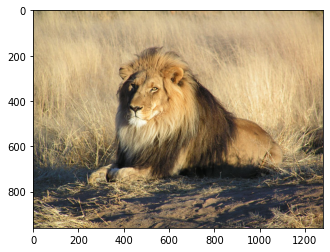

In [61]:
from skimage.io import imread
import matplotlib.pyplot as plt

i = imread('https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg')
print(plt.imshow(i))

In [58]:
img_resize_1 = resize(i,(50,50,3))
r = img_resize_1.flatten()
print(r.shape)
print(model.predict([r]))

(7500,)
['lion images']


AxesImage(54,36;334.8x217.44)


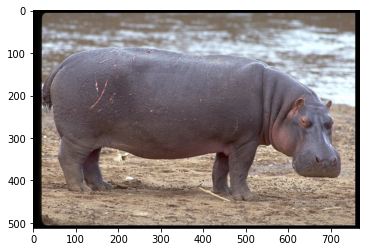

In [59]:
from skimage.io import imread
import matplotlib.pyplot as plt

i = imread('https://content.eol.org/data/media/87/d1/6c/7.CalPhotos_0091_3183_0936_0023.jpg')
print(plt.imshow(i))

In [60]:
img_resize_1 = resize(i,(50,50,3))
r = img_resize_1.flatten()
print(r.shape)
print(model.predict([r]))

(7500,)
['hippopotamus images']
